In [1]:
import sympy as sp
import minterpy as mp
import numpy as np
from minterpy.pointcloud_utils import *

from mpl_toolkits import mplot3d
%matplotlib inline

from mpl_toolkits.mplot3d import axes3d

import torch
import torchvision
from torchvision import transforms, datasets

import random
import numpy as np
import matplotlib.pyplot as plt

import os
from operator import itemgetter

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import ot

from sklearn.neighbors import NearestNeighbors

import ripser
import persim
from persim import plot_diagrams

from operator import itemgetter


#do pip installs as follows to use vedo for plotting point clouds
#pip install vedo
#pip install ipyvtklink

import numpy as np
from vedo import *

import matplotlib.pyplot
from mpl_toolkits.mplot3d import Axes3D

import time
torch.set_printoptions(precision=8)


In [2]:
def _compute_distance_matrix(x, p=2):
    x_flat = x.view(x.size(0), -1)

    distances = torch.norm(x_flat[:, None] - x_flat, dim=2, p=p)

    return distances

In [3]:
def get_persistence_diagram(point_cloud, maximum_dim):

    point_cloud = torch.tensor(point_cloud)

    dist_matrix = _compute_distance_matrix(point_cloud, p=2)
    diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=maximum_dim)['dgms']
    return diagrams, plot_diagrams(diagrams, show=True)


In [208]:

PH_7_giving_30_points = torch.tensor([[ 0.5738, -0.1217,  0.8099],
        [-0.4035,  0.7019, -0.5870],
        [ 0.7303, -0.3869,  0.5630],
        [ 0.8971,  0.3825,  0.2210],
        [ 0.4737,  0.6196,  0.6259],
        [ 0.2366,  0.3971, -0.8868],
        [-0.8723, -0.3745, -0.3145],
        [-0.1204,  0.1281, -0.9844],
        [ 0.3959,  0.6088, -0.6875],
        [-0.8566,  0.1515,  0.4933],
        [-0.0366, -0.6735,  0.7383],
        [ 0.1010, -0.3231, -0.9410],
        [-0.9367, -0.2104,  0.2798],
        [-0.4023,  0.2617, -0.8773],
        [-0.7749,  0.4295, -0.4638],
        [ 0.4113,  0.6073,  0.6797],
        [ 0.1690,  0.7614, -0.6259],
        [-0.3786, -0.4929, -0.7834],
        [ 0.3846,  0.2930,  0.8753],
        [-0.3639, -0.6566,  0.6607],
        [-0.5986,  0.7731,  0.2096],
        [ 0.6488, -0.3099, -0.6950],
        [-0.4391, -0.6711, -0.5974],
        [ 0.3209, -0.6878, -0.6511],
        [ 0.7513,  0.3147, -0.5801],
        [ 0.3028,  0.8917,  0.3365],
        [ 0.1806, -0.9513, -0.2499],
        [-0.5198, -0.6968,  0.4943],
        [-0.9573, -0.1228, -0.2618],
        [-0.2985,  0.5618,  0.7716]], dtype=torch.float64)

PH_8_giving_40_points = torch.tensor([[-0.1724,  0.6586,  0.7325],
        [ 0.2713, -0.1220,  0.9547],
        [ 0.1882, -0.9015, -0.3897],
        [-0.9445,  0.3227, -0.0617],
        [-0.7393, -0.4762,  0.4760],
        [-0.0352,  0.7986, -0.6009],
        [ 0.1162, -0.3318, -0.9362],
        [-0.0163, -0.1476,  0.9889],
        [ 0.7336, -0.6714, -0.1050],
        [-0.4835,  0.5424, -0.6871],
        [ 0.8664, -0.1362, -0.4805],
        [-0.5724, -0.5164, -0.6369],
        [ 0.5185,  0.8413,  0.1531],
        [-0.1293, -0.7402,  0.6598],
        [-0.2941,  0.9557, -0.0104],
        [ 0.2436,  0.9354, -0.2562],
        [-0.0104,  0.6418, -0.7668],
        [-0.7085, -0.5757,  0.4082],
        [-0.4029,  0.8635, -0.3034],
        [-0.7054,  0.7084,  0.0221],
        [ 0.4764, -0.8767, -0.0664],
        [ 0.3562,  0.3095,  0.8816],
        [ 0.4282, -0.2256, -0.8751],
        [ 0.9888,  0.1135,  0.0972],
        [ 0.6825, -0.7305,  0.0236],
        [-0.4627, -0.4586,  0.7587],
        [-0.5022, -0.3980, -0.7677],
        [-0.6761, -0.3225,  0.6625],
        [ 0.7988, -0.5689,  0.1955],
        [-0.7241,  0.3728,  0.5803],
        [ 0.0757, -0.5107,  0.8564],
        [-0.1718, -0.6691, -0.7231],
        [ 0.7733,  0.5120,  0.3739],
        [-0.4602, -0.8877,  0.0103],
        [-0.1742, -0.6330,  0.7543],
        [-0.3916, -0.9182,  0.0597],
        [-0.7885, -0.5381,  0.2980],
        [-0.4943, -0.4132, -0.7648],
        [ 0.2958,  0.9391,  0.1747],
        [ 0.7773,  0.6242,  0.0794]], dtype=torch.float64)
PH_4_giving_118_points = torch.tensor([[-0.2651, -0.4322,  0.8619],
        [ 0.6898, -0.1667, -0.7045],
        [-0.0871,  0.5762, -0.8127],
        [ 0.3271,  0.8354, -0.4416],
        [-0.4939, -0.8345, -0.2442],
        [ 0.8764, -0.0884,  0.4734],
        [ 0.6431,  0.3164, -0.6974],
        [-0.7641,  0.3586,  0.5362],
        [ 0.8443, -0.5150,  0.1478],
        [-0.8358,  0.5454, -0.0636],
        [ 0.5026, -0.8323,  0.2340],
        [ 0.6222, -0.5194, -0.5857],
        [-0.2971, -0.6850, -0.6652],
        [ 0.4015,  0.6218,  0.6725],
        [ 0.2522, -0.8294,  0.4986],
        [ 0.2171,  0.0214,  0.9759],
        [-0.0700, -0.8402, -0.5377],
        [ 0.9435, -0.0952, -0.3173],
        [ 0.8551, -0.2600,  0.4485],
        [ 0.3975, -0.6439, -0.6538],
        [ 0.8225,  0.1326,  0.5531],
        [ 0.4227,  0.2453,  0.8725],
        [-0.1840,  0.9557,  0.2297],
        [ 0.4145, -0.6820,  0.6026],
        [ 0.8243, -0.2608,  0.5026],
        [ 0.9668,  0.2099, -0.1458],
        [ 0.6324,  0.6268, -0.4552],
        [-0.5974,  0.5781,  0.5558],
        [ 0.1723, -0.4043, -0.8983],
        [-0.5820,  0.0063,  0.8132],
        [ 0.4465,  0.4500,  0.7734],
        [-0.4023,  0.9135,  0.0609],
        [-0.0425,  0.8609, -0.5070],
        [-0.8300,  0.5377,  0.1485],
        [ 0.3652, -0.7955, -0.4836],
        [-0.8143,  0.4062,  0.4147],
        [ 0.4905, -0.8683,  0.0740],
        [ 0.6848,  0.4945,  0.5352],
        [ 0.5309,  0.8381,  0.1256],
        [ 0.5873,  0.5907,  0.5533],
        [-0.0060, -0.4782,  0.8783],
        [ 0.6837,  0.5609,  0.4669],
        [ 0.7228, -0.6044,  0.3349],
        [-0.1568, -0.1316, -0.9788],
        [ 0.6994,  0.0336,  0.7139],
        [ 0.7230,  0.5065,  0.4699],
        [-0.3459, -0.6676,  0.6593],
        [ 0.4704,  0.7033, -0.5331],
        [ 0.5289,  0.7670,  0.3633],
        [-0.2380,  0.5541,  0.7977],
        [ 0.0304, -0.3255, -0.9450],
        [-0.5841, -0.1504, -0.7976],
        [-0.7347,  0.6353,  0.2379],
        [-0.7347,  0.6353,  0.2379],
        [ 0.6890,  0.5570,  0.4638],
        [ 0.6761, -0.3858,  0.6276],
        [ 0.3593,  0.6688, -0.6509],
        [ 0.3584, -0.2212, -0.9070],
        [-0.5979,  0.1560,  0.7863],
        [ 0.3304,  0.6254,  0.7069],
        [ 0.7187, -0.1212,  0.6847],
        [ 0.7250, -0.6574,  0.2053],
        [ 0.7329, -0.2239, -0.6424],
        [-0.3673,  0.5145,  0.7749],
        [-0.1461,  0.7177, -0.6809],
        [-0.4623,  0.6707,  0.5800],
        [-0.4752, -0.3852,  0.7911],
        [ 0.7558, -0.5034, -0.4188],
        [ 0.2361, -0.7485, -0.6197],
        [-0.5480, -0.3019, -0.7801],
        [-0.6619,  0.5192, -0.5406],
        [ 0.1671, -0.9581,  0.2325],
        [ 0.0784,  0.7630,  0.6417],
        [-0.7134,  0.0824,  0.6959],
        [ 0.4677, -0.4491,  0.7613],
        [ 0.7457, -0.3840, -0.5445],
        [-0.1568, -0.1316, -0.9788],
        [ 0.4837,  0.6335,  0.6039],
        [ 0.8056,  0.5834, -0.1034],
        [-0.0976,  0.7299, -0.6765],
        [ 0.5915, -0.5043,  0.6291],
        [-0.3071,  0.4091,  0.8592],
        [ 0.3320, -0.5705, -0.7512],
        [ 0.5933, -0.1072,  0.7978],
        [-0.4140, -0.9004, -0.1336],
        [ 0.6000, -0.4937, -0.6295],
        [-0.2948, -0.3186, -0.9009],
        [-0.6782,  0.3486,  0.6469],
        [-0.0123,  0.2467, -0.9690],
        [ 0.8551, -0.2600,  0.4485],
        [-0.2764, -0.1855,  0.9430],
        [-0.7823,  0.5379,  0.3140],
        [ 0.1126,  0.6242, -0.7731],
        [-0.8196,  0.2976,  0.4896],
        [ 0.8569,  0.1656,  0.4882],
        [ 0.4060,  0.1070,  0.9076],
        [-0.7641,  0.3586,  0.5362],
        [ 0.7138, -0.3212,  0.6224],
        [ 0.4549, -0.5356,  0.7115],
        [-0.8131,  0.5561, -0.1721],
        [-0.4129,  0.7253,  0.5509],
        [ 0.4015,  0.6218,  0.6725],
        [ 0.7006, -0.1749,  0.6918],
        [ 0.6274, -0.0197,  0.7785],
        [ 0.7228, -0.5972, -0.3477],
        [-0.2528,  0.3951, -0.8832],
        [-0.5820,  0.0063,  0.8132],
        [ 0.9894,  0.0772, -0.1229],
        [ 0.3975, -0.6439, -0.6538],
        [ 0.6049, -0.4774,  0.6373],
        [-0.6771, -0.2742, -0.6829],
        [-0.3546,  0.4594, -0.8144],
        [-0.6579,  0.3467,  0.6685],
        [-0.9783,  0.1955, -0.0691],
        [ 0.4651, -0.4447, -0.7654],
        [-0.6307,  0.6143, -0.4742],
        [ 0.5900,  0.6465, -0.4837],
        [ 0.8293,  0.4805,  0.2852]], dtype=torch.float64)


In [5]:

trial_points = torch.tensor([[ 0.5738, -0.1217,  0.8099],
        [-0.4035,  0.7019, -0.5870],
        [ 0.7303, -0.3869,  0.5630],
        [ 0.8971,  0.3825,  0.2210],
        [ 0.4737,  0.6196,  0.6259],
        [ 0.2366,  0.3971, -0.8868],
        [-0.8723, -0.3745, -0.3145]], dtype=torch.float64)

In [220]:
dist_matrix = _compute_distance_matrix(PH_8_giving_40_points, p=2)

start = time.time()

diagrams = ripser.ripser(dist_matrix.cpu().detach().numpy(), distance_matrix=True, maxdim=2)['dgms']

end = time.time()

print(f"Runtime of the program is {end - start}")

Runtime of the program is 0.018723011016845703


In [221]:
dist_matrix[4][36]

tensor(0.19477230, dtype=torch.float64)

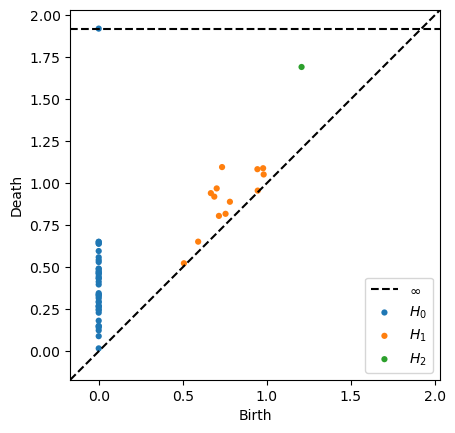

In [222]:
plot_diagrams(diagrams, show=True)

In [223]:
diagrams

[array([[0.        , 0.01737412],
        [0.        , 0.08986974],
        [0.        , 0.12428085],
        [0.        , 0.14127208],
        [0.        , 0.14979352],
        [0.        , 0.15047252],
        [0.        , 0.18195675],
        [0.        , 0.22961727],
        [0.        , 0.24418578],
        [0.        , 0.24980028],
        [0.        , 0.26303965],
        [0.        , 0.26823804],
        [0.        , 0.2707715 ],
        [0.        , 0.29075551],
        [0.        , 0.29636416],
        [0.        , 0.3151747 ],
        [0.        , 0.3258639 ],
        [0.        , 0.33519495],
        [0.        , 0.33714533],
        [0.        , 0.3457478 ],
        [0.        , 0.39731833],
        [0.        , 0.41379941],
        [0.        , 0.43381697],
        [0.        , 0.43406606],
        [0.        , 0.44580698],
        [0.        , 0.46147129],
        [0.        , 0.46396312],
        [0.        , 0.47065115],
        [0.        , 0.4774113 ],
        [0.   

In [224]:
upp_diag = torch.triu(dist_matrix, diagonal=1)

In [225]:
upp_diag


tensor([[0.00000000, 0.92497508, 1.95532023,  ..., 1.86929991, 0.78040523,
         1.15310583],
        [0.00000000, 0.00000000, 1.55625744,  ..., 1.90463147, 1.31716873,
         1.25658288],
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.91920789, 1.92819436,
         1.70142708],
        ...,
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.00000000, 1.82637169,
         1.84549152],
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.00000000, 0.00000000,
         0.58316923],
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.00000000, 0.00000000,
         0.00000000]], dtype=torch.float64)

In [226]:
upp_diag.sort()

torch.return_types.sort(
values=tensor([[0.00000000, 0.63970256, 0.65078382,  ..., 1.95532023, 1.96182104,
         1.97016725],
        [0.00000000, 0.00000000, 0.29075550,  ..., 1.90817714, 1.90881504,
         1.92526820],
        [0.00000000, 0.00000000, 0.00000000,  ..., 1.88676395, 1.92819436,
         1.95593293],
        ...,
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.00000000, 1.82637169,
         1.84549152],
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.00000000, 0.00000000,
         0.58316923],
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.00000000, 0.00000000,
         0.00000000]], dtype=torch.float64),
indices=tensor([[ 0, 29, 21,  ...,  2,  6, 31],
        [ 1,  0,  7,  ..., 26,  6,  9],
        [ 1,  2,  0,  ..., 19, 38, 14],
        ...,
        [29, 20, 21,  ..., 19, 38, 39],
        [29, 20, 21,  ..., 17, 19, 39],
        [30, 21, 22,  ..., 17, 18, 19]]))

In [227]:
ff = upp_diag.sort()

In [228]:
sorted_upper_diag_edges = ff[0]

In [229]:
sorted_upper_diag_indices = ff[1]

In [230]:
sorted_upper_diag_edges

tensor([[0.00000000, 0.63970256, 0.65078382,  ..., 1.95532023, 1.96182104,
         1.97016725],
        [0.00000000, 0.00000000, 0.29075550,  ..., 1.90817714, 1.90881504,
         1.92526820],
        [0.00000000, 0.00000000, 0.00000000,  ..., 1.88676395, 1.92819436,
         1.95593293],
        ...,
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.00000000, 1.82637169,
         1.84549152],
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.00000000, 0.00000000,
         0.58316923],
        [0.00000000, 0.00000000, 0.00000000,  ..., 0.00000000, 0.00000000,
         0.00000000]], dtype=torch.float64)

In [231]:
sorted_upper_diag_indices

tensor([[ 0, 29, 21,  ...,  2,  6, 31],
        [ 1,  0,  7,  ..., 26,  6,  9],
        [ 1,  2,  0,  ..., 19, 38, 14],
        ...,
        [29, 20, 21,  ..., 19, 38, 39],
        [29, 20, 21,  ..., 17, 19, 39],
        [30, 21, 22,  ..., 17, 18, 19]])

In [232]:
flattened_uppdg_edges = torch.flatten(sorted_upper_diag_edges)

In [233]:
flattened_uppdg_edges

tensor([0.00000000, 0.63970256, 0.65078382,  ..., 0.00000000, 0.00000000,
        0.00000000], dtype=torch.float64)

In [234]:
non_zero_flattened_uppdg_edges = flattened_uppdg_edges[flattened_uppdg_edges.nonzero()]

In [21]:
non_zero_flattened_uppdg_edges.shape

torch.Size([780, 1])

In [22]:
non_zero_flattened_uppdg_edges = non_zero_flattened_uppdg_edges.reshape(non_zero_flattened_uppdg_edges.shape[0])

In [23]:
increasing_edges = non_zero_flattened_uppdg_edges.sort()[0]

In [24]:
increasing_edges

tensor([0.01737412, 0.08986974, 0.12428085, 0.14127208, 0.14979352, 0.15047252,
        0.18195675, 0.18988217, 0.19477230, 0.22961727, 0.24418577, 0.24980028,
        0.26303965, 0.26823805, 0.27077151, 0.29075550, 0.29636415, 0.31517470,
        0.32412581, 0.32586390, 0.33134557, 0.33519494, 0.33714532, 0.34574780,
        0.36031721, 0.36516682, 0.39589975, 0.39731834, 0.41379941, 0.42970749,
        0.43381698, 0.43406605, 0.43729634, 0.43815222, 0.44382463, 0.44580699,
        0.44610530, 0.44747663, 0.46147128, 0.46396311, 0.47065116, 0.47128990,
        0.47741130, 0.48102103, 0.48995516, 0.49206392, 0.50194752, 0.50678127,
        0.51698570, 0.52348999, 0.53085345, 0.54292294, 0.54966741, 0.55304935,
        0.55926053, 0.56176751, 0.56331279, 0.56983364, 0.58239515, 0.58316923,
        0.59075037, 0.59156658, 0.59642331, 0.59727808, 0.59899291, 0.59934126,
        0.61848167, 0.63917524, 0.63930757, 0.63970256, 0.64114674, 0.64142756,
        0.64435491, 0.64648797, 0.649134

In [25]:
(upp_diag == increasing_edges[0]).nonzero(as_tuple=False)


tensor([[26, 37]])

In [26]:
selected_edges = torch.tensor([])
dead_indices = torch.tensor([])
for i in range(increasing_edges.shape[0]):
    a = (upp_diag == increasing_edges[i]).nonzero(as_tuple=False)
    #a = a.reshape(a.shape[1])
    print("It no: ", i)
    print("The edge is : ", increasing_edges[i])
    print("Current indices : ",a)
    #print(a[0][0])
    print("currently dead indices :  " )
    print(dead_indices)

    b = a[0][0]
    b = b.reshape(1,1)  
    if(b==0):
        c = a[0][1]
        if(not(c in dead_indices) ):
            
            c = c.reshape(1,1)  
            dead_indices = torch.cat(((dead_indices, c)), 0)
            selected_edges = torch.cat(((selected_edges, a)), 0)
            
    elif((b in dead_indices) and not(a[0][1] in dead_indices) ):
            d = a[0][1]
            d = d.reshape(1,1)
        
            dead_indices = torch.cat(((dead_indices, d)), 0)
            selected_edges = torch.cat(((selected_edges, a)), 0)
            
            
    elif(not(b in dead_indices) or not(a[0][1] in dead_indices) ):
        if(b in dead_indices):
            d = a[0][1]
            d = d.reshape(1,1)
            dead_indices = torch.cat(((dead_indices, d)), 0)
            selected_edges = torch.cat(((selected_edges, a)), 0)

        else:
            print("dead point : ", b)
            dead_indices = torch.cat(((dead_indices, b)), 0)
            selected_edges = torch.cat(((selected_edges, a)), 0)


        


It no:  0
The edge is :  tensor(0.01737412, dtype=torch.float64)
Current indices :  tensor([[26, 37]])
currently dead indices :  
tensor([])
dead point :  tensor([[26]])
It no:  1
The edge is :  tensor(0.08986974, dtype=torch.float64)
Current indices :  tensor([[33, 35]])
currently dead indices :  
tensor([[26.]])
dead point :  tensor([[33]])
It no:  2
The edge is :  tensor(0.12428085, dtype=torch.float64)
Current indices :  tensor([[ 4, 17]])
currently dead indices :  
tensor([[26.],
        [33.]])
dead point :  tensor([[4]])
It no:  3
The edge is :  tensor(0.14127208, dtype=torch.float64)
Current indices :  tensor([[17, 36]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.]])
dead point :  tensor([[17]])
It no:  4
The edge is :  tensor(0.14979352, dtype=torch.float64)
Current indices :  tensor([[13, 34]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.]])
dead point :  tensor([[13]])
It no:  5
The edge is :  tensor(0.1504725

It no:  93
The edge is :  tensor(0.70307076, dtype=torch.float64)
Current indices :  tensor([[15, 39]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [ 7.],
        [31.],
        [ 2.],
        [15.],
        [21.],
        [ 3.],
        [18.],
        [19.],
        [ 9.],
        [23.],
        [35.],
        [38.],
        [10.],
        [37.],
        [29.],
        [16.]])
It no:  94
The edge is :  tensor(0.70693098, dtype=torch.float64)
Current indices :  tensor([[ 1, 34]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
  

It no:  207
The edge is :  tensor(1.07014159, dtype=torch.float64)
Current indices :  tensor([[30, 33]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [ 7.],
        [31.],
        [ 2.],
        [15.],
        [21.],
        [ 3.],
        [18.],
        [19.],
        [ 9.],
        [23.],
        [35.],
        [38.],
        [10.],
        [37.],
        [29.],
        [16.],
        [22.]])
It no:  208
The edge is :  tensor(1.07054955, dtype=torch.float64)
Current indices :  tensor([[20, 30]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],


Current indices :  tensor([[13, 29]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [ 7.],
        [31.],
        [ 2.],
        [15.],
        [21.],
        [ 3.],
        [18.],
        [19.],
        [ 9.],
        [23.],
        [35.],
        [38.],
        [10.],
        [37.],
        [29.],
        [16.],
        [22.]])
It no:  300
The edge is :  tensor(1.26632486, dtype=torch.float64)
Current indices :  tensor([[ 4, 37]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
       

tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [ 7.],
        [31.],
        [ 2.],
        [15.],
        [21.],
        [ 3.],
        [18.],
        [19.],
        [ 9.],
        [23.],
        [35.],
        [38.],
        [10.],
        [37.],
        [29.],
        [16.],
        [22.]])
It no:  387
The edge is :  tensor(1.42267267, dtype=torch.float64)
Current indices :  tensor([[16, 23]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.

The edge is :  tensor(1.50869285, dtype=torch.float64)
Current indices :  tensor([[24, 36]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [ 7.],
        [31.],
        [ 2.],
        [15.],
        [21.],
        [ 3.],
        [18.],
        [19.],
        [ 9.],
        [23.],
        [35.],
        [38.],
        [10.],
        [37.],
        [29.],
        [16.],
        [22.]])
It no:  432
The edge is :  tensor(1.51240663, dtype=torch.float64)
Current indices :  tensor([[18, 21]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.

tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [ 7.],
        [31.],
        [ 2.],
        [15.],
        [21.],
        [ 3.],
        [18.],
        [19.],
        [ 9.],
        [23.],
        [35.],
        [38.],
        [10.],
        [37.],
        [29.],
        [16.],
        [22.]])
It no:  526
The edge is :  tensor(1.64077399, dtype=torch.float64)
Current indices :  tensor([[14, 17]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.

Current indices :  tensor([[ 0, 10]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [ 7.],
        [31.],
        [ 2.],
        [15.],
        [21.],
        [ 3.],
        [18.],
        [19.],
        [ 9.],
        [23.],
        [35.],
        [38.],
        [10.],
        [37.],
        [29.],
        [16.],
        [22.]])
It no:  609
The edge is :  tensor(1.78428346, dtype=torch.float64)
Current indices :  tensor([[ 6, 27]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
       

currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],
        [28.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [ 7.],
        [31.],
        [ 2.],
        [15.],
        [21.],
        [ 3.],
        [18.],
        [19.],
        [ 9.],
        [23.],
        [35.],
        [38.],
        [10.],
        [37.],
        [29.],
        [16.],
        [22.]])
It no:  696
The edge is :  tensor(1.87774372, dtype=torch.float64)
Current indices :  tensor([[14, 35]])
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [11.],
        [36.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [20.],
        [25.],
        [ 1.],
        [30.],
        [32.],


In [196]:
# function to check whether the selected edge is going to close a potential loop

def expecting_a_cycle(actual_new_test, my_edge):

    left_ind = my_edge[0][0]
    right_ind = my_edge[0][1]
    #print(right_ind)
    found_right_ind = False
    going_nowhere= False

    new_test = actual_new_test

    tracker = 0
    no_branches_formed = True
    while (not(found_right_ind) or not(going_nowhere)):

        #Checking where all am I finding the left point of the edge in the edges I have already selected 
        positions1 = (new_test == left_ind).nonzero(as_tuple=False)

        #print("adjaoined point index ",positions1)
        #print("Shape of positions found", positions1.shape)

        #print("Number of branches rising : ", positions1.shape[0])

        if(positions1.shape[0]>1):
            edge_to_delete = new_test[positions1[0][0]]
            no_branches_formed = False
            #print("The edge to be deleted ", edge_to_delete)
            #print("The shape of the actual edge to be deleted ", edge_to_delete.shape[0])
        
        branches_rising = positions1.shape[0]
        #print("To fix for loop range",branches_rising)



        if(positions1.shape[0]==0):
            #if(i==(positions1.shape[0]-1)):
            going_nowhere= True
            #print("There is no loop")
            #print("I got nowhere")
            if(no_branches_formed):
                break
            
            #print("I should delete the edge : ", edge_to_delete)
            left_ind = my_edge[0][0]

            #find the position of the edge to be deleted in the actual t
            deletable_edge_position1 = (actual_new_test == edge_to_delete[0]).nonzero(as_tuple=False)
            deletable_edge_position2 = (actual_new_test == edge_to_delete[1]).nonzero(as_tuple=False)

            deletable_edge_position1 = deletable_edge_position1[:,0]

            deletable_edge_position2 = deletable_edge_position2[:,0]

            #print("What happened : ", deletable_edge_position1, deletable_edge_position1)

            a_cat_b1, counts1 = torch.cat([deletable_edge_position1, deletable_edge_position2]).unique(return_counts=True)
            deletable_row_position = a_cat_b1[torch.where(counts1.gt(1))]
            #print("Here it is : ", deletable_row_position.shape[0])

            if(deletable_row_position.shape[0]==0):
                #print(" Your edge is not going to form a cycle ")
                going_nowhere = True
                break

            deletable_row_position = deletable_row_position[0]


            #print("Position of edge to be deleted as columns ", deletable_edge_position1, deletable_edge_position2)
            #print("Deletable row position : ", deletable_row_position)


            #now deleting the row to be deleted
            actual_new_test = torch.cat((actual_new_test[:deletable_row_position], actual_new_test[deletable_row_position+1:]))
            new_test = actual_new_test
            #edge_to_delete = torch.tensor([0])
            #print("shape of edge to delete", edge_to_delete.shape[0])
            #print(new_test)


            positions1 = (new_test == left_ind).nonzero(as_tuple=False)
            #print()
            #print()
            #print()

            if(tracker ==0):
                break


        
        if(positions1.shape[0]>1):
            edge_to_delete = new_test[positions1[0][0]]
            no_branches_formed = False
                
                
        #for i in range(positions1.shape[0]):

        first_position = positions1[0][0]
        #print("Where is it ",first_position)

        # What is the edge at the position I found
        adj_edge1 = new_test[positions1[0][0]]
        #print("The new edge is ",adj_edge1)


        #Consecutive index of the newly found edge
        other_end1 = abs(positions1 - torch.tensor([[0, 1]]))
        #print("The new point found is at the index ",other_end1)

        #consecutive point of the newly found edge

        consec_pt1 = new_test[other_end1[0][0]][other_end1[0][1]]
        consec_pt1 = int(consec_pt1)
        #print(" The new point is ",consec_pt1)

        if(consec_pt1 == right_ind):
            found_right_ind = True
            #print("This forms a loop")
            #print("traversions : ", tracker)
            break



        else:
            left_ind = consec_pt1
            new_test = torch.cat((new_test[:first_position], new_test[first_position+1:]))
            tracker = tracker+1

    #print("The cycle exists : ", found_right_ind)




    
    return found_right_ind



In [197]:
selected_edges = torch.tensor([])
#end_indices = torch.tensor([])
dead_indices = torch.tensor([])
potential_triangles = torch.tensor([])
edge_leads_to_loop = False

for i in range(increasing_edges.shape[0]):
    a = (upp_diag == increasing_edges[i]).nonzero(as_tuple=False)
    #a = a.reshape(a.shape[1])
    print("It no: ", i)
    print("The edge is : ", increasing_edges[i])
    print("Current indices : ",a)
    
    #check if the edge could potentially cause the birth of a loop or a triangle (or a higher order simplex)
    closure_edge = a
    n1 = closure_edge[0][0]
    n2 = closure_edge[0][1]
    
    fir = dist_matrix[:,n1] < dist_matrix[n1][n2]
    sec = dist_matrix[:,n2] < dist_matrix[n1][n2]

    loop_nodes_one = (fir == True).nonzero(as_tuple=False)
    loop_nodes_two = (sec == True).nonzero(as_tuple=False)
    #loop intersections
    a_cat_bl, countsl = torch.cat([loop_nodes_one, loop_nodes_two]).unique(return_counts=True)
    loops_joined= a_cat_bl[torch.where(countsl.gt(1))]
    
    
    closure_nodes = closure_edge.reshape(2,1)
    a_cat_b, counts = torch.cat([loop_nodes_one, loop_nodes_two, closure_nodes]).unique(return_counts=True)
    nodes_after_join = a_cat_b[torch.where(counts.gt(1))]
    is_it_a_loop = ((loop_nodes_one.shape[0] + loop_nodes_two.shape[0] + closure_nodes.shape[0])/2 == nodes_after_join.shape[0]) and (nodes_after_join.shape[0]>=3)
    is_it_triangle = nodes_after_join.shape[0]==3
    print("This edge could give birth to a loop/triangle ", is_it_a_loop)
    print("How many nodes after joining : ", nodes_after_join.shape[0]>2)
    
    #print(a[0][0])
    print("currently dead indices :  " )
    print(dead_indices)


    first_index = a[0][0]
    first_index = first_index.reshape(1,1)
    second_index = a[0][1]
    
    
    
    second_index = second_index.reshape(1,1)
    print("1st cond ",(first_index in dead_indices))
    print("2nd cond ", (not(second_index in dead_indices)))
    print("Selected edge indices until now : ", selected_edges)
    
    if(selected_edges.shape[0] > 5):
        edge_leads_to_loop = expecting_a_cycle(selected_edges, a)
        print("what happend : ", edge_leads_to_loop)
    
    print("check", loops_joined.shape[0])
    
    '''
    if(selected_edges.shape[0] >=1):
        print("Tracking connected components", selected_edges[:,0])'''
            
    if((loops_joined.shape[0]<1) and not(edge_leads_to_loop)):
    #if((loops_joined.shape[0]<1) or not(edge_leads_to_loop)):
        print("did it come here", loops_joined.shape[0])

    
        if( first_index==0 and (not(second_index in dead_indices)) ):
            print("dead point : ", second_index)
            #dead_indices = torch.cat(((dead_indices, second_index)), 0)
            selected_edges = torch.cat(((selected_edges, a)), 0)
            #freshened_edges = torch.cat(((freshened_edges, a)), 0)

        elif((not(first_index in dead_indices))):
            
            
            if((second_index in selected_edges) ):
                dead_indices = torch.cat(((dead_indices, second_index)), 0)
                print("dead point : ", second_index)
                selected_edges = torch.cat(((selected_edges, a)), 0)

            else:
                dead_indices = torch.cat(((dead_indices, first_index)), 0)
                print("dead point : ", first_index)
                selected_edges = torch.cat(((selected_edges, a)), 0)

            
            #end_indices = torch.cat(((end_indices, second_index)), 0)


        elif((first_index in dead_indices) and (not(second_index in dead_indices)) ):
            print("dead point : ", second_index)


            dead_indices = torch.cat(((dead_indices, second_index)), 0)
            selected_edges = torch.cat(((selected_edges, a)), 0)
            #freshened_edges = torch.cat(((freshened_edges, a)), 0)

            


It no:  0
The edge is :  tensor(0.01737412, dtype=torch.float64)
Current indices :  tensor([[26, 37]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  False
currently dead indices :  
tensor([])
1st cond  False
2nd cond  True
Selected edge indices until now :  tensor([])
check 0
did it come here 0
dead point :  tensor([[26]])
It no:  1
The edge is :  tensor(0.08986974, dtype=torch.float64)
Current indices :  tensor([[33, 35]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  False
currently dead indices :  
tensor([[26.]])
1st cond  False
2nd cond  True
Selected edge indices until now :  tensor([[26., 37.]])
check 0
did it come here 0
dead point :  tensor([[33]])
It no:  2
The edge is :  tensor(0.12428085, dtype=torch.float64)
Current indices :  tensor([[ 4, 17]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  False
currently dead indices :  
tensor([[26.],
        [33.]])
1st

what happend :  False
check 0
did it come here 0
dead point :  tensor([[18]])
It no:  43
The edge is :  tensor(0.48102103, dtype=torch.float64)
Current indices :  tensor([[14, 19]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],

what happend :  True
check 2
It no:  79
The edge is :  tensor(0.65685711, dtype=torch.float64)
Current indices :  tensor([[2, 8]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  False
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 

what happend :  True
check 3
It no:  110
The edge is :  tensor(0.79888653, dtype=torch.float64)
Current indices :  tensor([[27, 30]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8.

what happend :  True
check 1
It no:  135
The edge is :  tensor(0.88764982, dtype=torch.float64)
Current indices :  tensor([[ 2, 11]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  False
2nd cond  True
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8.

Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.],
        [23., 32.],
        [ 2., 31.],
        [33., 36.],
        [10., 22.],
        [ 0., 29.],
        [10., 23.],
        [ 0., 21.],
        [19., 29.]])
what happend :  True
check 0
It no:  165
The edge is :  tensor(0.94782177, dtype=torch.float64)
Current indices :  tensor([[22, 37]])
This edge could give birth to a loop/triangle  Fal

1st cond  True
2nd cond  True
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.],
        [23., 32.],
        [ 2., 31.],
        [33., 36.],
        [10., 22.],
        [ 0., 29.],
        [10., 23.],
        [ 0., 21.],
        [19., 29.]])
what happend :  True
check 1
It no:  192
The edge is :  tensor(1.02852470, dtype=torch.float64)
Current indices :  tensor([[12, 18]])
This edge could give

what happend :  True
check 4
It no:  217
The edge is :  tensor(1.08896083, dtype=torch.float64)
Current indices :  tensor([[21, 34]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8.

what happend :  True
check 7
It no:  243
The edge is :  tensor(1.15459793, dtype=torch.float64)
Current indices :  tensor([[ 0, 25]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  False
2nd cond  True
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8.

Current indices :  tensor([[10, 16]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  False
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
       

It no:  296
The edge is :  tensor(1.26235598, dtype=torch.float64)
Current indices :  tensor([[ 6, 35]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  True
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
  

what happend :  True
check 10
It no:  325
The edge is :  tensor(1.31142448, dtype=torch.float64)
Current indices :  tensor([[17, 20]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8

2nd cond  True
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.],
        [23., 32.],
        [ 2., 31.],
        [33., 36.],
        [10., 22.],
        [ 0., 29.],
        [10., 23.],
        [ 0., 21.],
        [19., 29.]])
what happend :  True
check 9
It no:  350
The edge is :  tensor(1.36876883, dtype=torch.float64)
Current indices :  tensor([[ 7, 23]])
This edge could give birth to a loo

what happend :  True
check 8
It no:  373
The edge is :  tensor(1.40135090, dtype=torch.float64)
Current indices :  tensor([[ 0, 13]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  False
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8

what happend :  True
check 7
It no:  401
The edge is :  tensor(1.44151834, dtype=torch.float64)
Current indices :  tensor([[ 8, 21]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8.

It no:  427
The edge is :  tensor(1.49415985, dtype=torch.float64)
Current indices :  tensor([[14, 27]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
 

This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
      

tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
   

what happend :  True
check 13
It no:  508
The edge is :  tensor(1.61712057, dtype=torch.float64)
Current indices :  tensor([[30, 38]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8

what happend :  True
check 16
It no:  535
The edge is :  tensor(1.65589001, dtype=torch.float64)
Current indices :  tensor([[21, 35]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  True
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8.

what happend :  True
check 16
It no:  562
The edge is :  tensor(1.71418366, dtype=torch.float64)
Current indices :  tensor([[ 7, 10]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  False
2nd cond  True
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8

what happend :  True
check 22
It no:  593
The edge is :  tensor(1.75768099, dtype=torch.float64)
Current indices :  tensor([[29, 31]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8

what happend :  True
check 27
It no:  617
The edge is :  tensor(1.79640934, dtype=torch.float64)
Current indices :  tensor([[ 7, 31]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  False
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 

It no:  641
The edge is :  tensor(1.83095710, dtype=torch.float64)
Current indices :  tensor([[13, 14]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
 

what happend :  True
check 30
It no:  667
The edge is :  tensor(1.84833134, dtype=torch.float64)
Current indices :  tensor([[ 0, 20]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  False
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 

what happend :  True
check 32
It no:  695
The edge is :  tensor(1.87764445, dtype=torch.float64)
Current indices :  tensor([[12, 31]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8

what happend :  True
check 30
It no:  717
The edge is :  tensor(1.90817714, dtype=torch.float64)
Current indices :  tensor([[ 1, 26]])
This edge could give birth to a loop/triangle  False
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8

1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.],
        [23., 32.],
        [ 2., 31.],
        [33., 36.],
        [10., 22.],
        [ 0., 29.],
        [10., 23.],
        [ 0., 21.],
        [19., 29.]])
what happend :  True
check 34
It no:  744
The edge is :  tensor(1.95040176, dtype=torch.float64)
Current indices :  tensor([[22, 29]])
This edge could gi

what happend :  True
check 38
It no:  770
The edge is :  tensor(1.98859146, dtype=torch.float64)
Current indices :  tensor([[14, 20]])
This edge could give birth to a loop/triangle  True
How many nodes after joining :  True
currently dead indices :  
tensor([[26.],
        [33.],
        [ 4.],
        [17.],
        [13.],
        [ 8.],
        [37.],
        [ 5.],
        [12.],
        [27.],
        [24.],
        [24.],
        [27.],
        [ 1.],
        [34.],
        [32.],
        [14.],
        [ 6.],
        [34.],
        [39.],
        [30.],
        [37.],
        [20.],
        [38.],
        [21.],
        [ 3.],
        [15.],
        [19.],
        [18.],
        [16.],
        [31.],
        [32.],
        [31.],
        [36.],
        [22.],
        [23.],
        [21.],
        [29.]])
1st cond  True
2nd cond  False
Selected edge indices until now :  tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8.

In [29]:
new_test2 = torch.tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.]])

current_index = torch.tensor([[20, 24]])


In [30]:
expecting_a_cycle(new_test2, current_index)

False

In [31]:
new_test = torch.tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.]])

#edge which I want to check if it is part of a loop
my_edge = torch.tensor([[ 9, 18]])

my_edge[0][0]

tensor(9)

In [32]:
positionsemp = (new_test == 55).nonzero(as_tuple=False)
positionsemp.shape[0]

0

In [33]:
#initializing from the left point of the edge
left_ind = my_edge[0][0]
left_ind

tensor(9)

In [34]:
#Checking where all am I finding the left point of the edge in the edges I have already selected 
positions1 = (new_test == left_ind).nonzero(as_tuple=False)


In [35]:
positions1

tensor([[29,  0]])

In [36]:
first_position = positions1[0][0]
first_position

tensor(29)

In [37]:
# What is the edge at the position I found
adj_edge1 = new_test[positions1[0][0]]
adj_edge1

tensor([ 9., 16.])

In [38]:
#Consecutive index of the newly found edge
other_end1 = abs(positions1 - torch.tensor([[0, 1]]))

(other_end1)

tensor([[29,  1]])

In [39]:
#consecutive point of the newly found edge

consec_pt1 = new_test[other_end[0][0]][other_end[0][1]]

consec_pt1 = int(consec_pt1)
consec_pt1


NameError: name 'other_end' is not defined

In [40]:
#eliminate the finished edge from the edge 

new_test_upd = torch.cat((new_test[:first_position], new_test[first_position+1:]))
new_test_upd

tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 6., 31.]])

In [41]:
#Find the position of the new consecutive point in already selected edges
positions2 = (new_test_upd == consec_pt1).nonzero(as_tuple=False)
positions2

NameError: name 'consec_pt1' is not defined

In [42]:
sec_position = positions2[0][0]
sec_position

NameError: name 'positions2' is not defined

In [43]:
# What is the edge at the position I found
adj_edge2 = new_test_upd[positions2[0][0]]
adj_edge2

NameError: name 'positions2' is not defined

In [44]:
#Consecutive index of the newly found edge
other_end2 = abs(positions2 - torch.tensor([[0, 1]]))

(other_end2)

NameError: name 'positions2' is not defined

In [45]:
#consecutive point of the newly found edge

consec_pt2 = new_test_upd[other_end2[0][0]][other_end2[0][1]]

consec_pt2 = int(consec_pt2)
consec_pt2


NameError: name 'other_end2' is not defined

In [46]:
#eliminate the finished edge from the edge 

new_test_upd2 = torch.cat((new_test_upd[:sec_position], new_test_upd[sec_position+1:]))
new_test_upd2

NameError: name 'sec_position' is not defined

In [47]:
#Find the position of the new consecutive point in already selected edges
positions3 = (new_test_upd2 == consec_pt2).nonzero(as_tuple=False)
positions3

NameError: name 'new_test_upd2' is not defined

In [48]:
third_position = positions3[1][0]
third_position

NameError: name 'positions3' is not defined

In [49]:
# What is the edge at the position I found
adj_edge3 = new_test_upd2[positions3[1][0]]
adj_edge3

NameError: name 'new_test_upd2' is not defined

In [50]:
#Consecutive index of the newly found edge
other_end3 = abs(positions3 - torch.tensor([[0, 1]]))

(other_end3)

NameError: name 'positions3' is not defined

In [51]:
#consecutive point of the newly found edge

consec_pt3 = new_test_upd2[other_end3[1][0]][other_end3[1][1]]

consec_pt3 = int(consec_pt3)
consec_pt3


NameError: name 'new_test_upd2' is not defined

In [52]:
# advanced method: demonstration of checking for a potential loop that could be formed by adding the edge

#get printed in between

'''actual_new_test = torch.tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.]])
'''
actual_new_test= torch.tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.]])
my_edge = torch.tensor([[ 4, 27]])

#my_edge = torch.tensor([[20, 24]])


left_ind = my_edge[0][0]
right_ind = my_edge[0][1]
#print(right_ind)
found_right_ind = False
going_nowhere= False

new_test = actual_new_test

tracker = 0
no_branches_formed = True
while (not(found_right_ind) or not(going_nowhere)):
    
    #Checking where all am I finding the left point of the edge in the edges I have already selected 
    positions1 = (new_test == left_ind).nonzero(as_tuple=False)
    
    print("adjaoined point index ",positions1)
    print("Shape of positions found", positions1.shape)
    
    print("Number of branches rising : ", positions1.shape[0])
    
    if(positions1.shape[0]>1):
        edge_to_delete = new_test[positions1[0][0]]
        no_branches_formed = False
        print("The edge to be deleted ", edge_to_delete)
        print("The shape of the actual edge to be deleted ", edge_to_delete.shape[0])
    '''else:
        edge_to_delete == torch.tensor([0])'''
    
    branches_rising = positions1.shape[0]
    print("To fix for loop range",branches_rising)
    

    
    if(positions1.shape[0]==0):
        #if(i==(positions1.shape[0]-1)):
        going_nowhere= True
        print("There is no loop")
        print("I got nowhere")
        if(no_branches_formed):
            break
        '''
        if(edge_to_delete == torch.tensor(0)):
            break'''
        
        print("I should delete the edge : ", edge_to_delete)
        left_ind = my_edge[0][0]
        
        #find the position of the edge to be deleted in the actual t
        deletable_edge_position1 = (actual_new_test == edge_to_delete[0]).nonzero(as_tuple=False)
        deletable_edge_position2 = (actual_new_test == edge_to_delete[1]).nonzero(as_tuple=False)
        
        deletable_edge_position1 = deletable_edge_position1[:,0]
        
        deletable_edge_position2 = deletable_edge_position2[:,0]
        
        print("What happened : ", deletable_edge_position1, deletable_edge_position1)
        
        a_cat_b1, counts1 = torch.cat([deletable_edge_position1, deletable_edge_position2]).unique(return_counts=True)
        deletable_row_position = a_cat_b1[torch.where(counts1.gt(1))]
        print("Here it is : ", deletable_row_position.shape[0])
        
        if(deletable_row_position.shape[0]==0):
            print(" Your edge is not going to form a cycle ")
            going_nowhere = True
            break
        
        deletable_row_position = deletable_row_position[0]
        

        print("Position of edge to be deleted as columns ", deletable_edge_position1, deletable_edge_position2)
        print("Deletable row position : ", deletable_row_position)


        #now deleting the row to be deleted
        actual_new_test = torch.cat((actual_new_test[:deletable_row_position], actual_new_test[deletable_row_position+1:]))
        new_test = actual_new_test
        #edge_to_delete = torch.tensor([0])
        print("shape of edge to delete", edge_to_delete.shape[0])
        print(new_test)
        
        
        positions1 = (new_test == left_ind).nonzero(as_tuple=False)
        print()
        print()
        print()
        
        if(tracker ==0):
            break
        

        

    #for i in range(positions1.shape[0]):
        
    first_position = positions1[0][0]
    print("Where is it ",first_position)

    # What is the edge at the position I found
    adj_edge1 = new_test[positions1[0][0]]
    print("The new edge is ",adj_edge1)
    
        
    #Consecutive index of the newly found edge
    other_end1 = abs(positions1 - torch.tensor([[0, 1]]))
    print("The new point found is at the index ",other_end1)

    #consecutive point of the newly found edge

    consec_pt1 = new_test[other_end1[0][0]][other_end1[0][1]]
    consec_pt1 = int(consec_pt1)
    print(" The new point is ",consec_pt1)

    if(consec_pt1 == right_ind):
        found_right_ind = True
        print("This forms a loop")
        print("traversions : ", tracker)
        break



    else:
        left_ind = consec_pt1
        new_test = torch.cat((new_test[:first_position], new_test[first_position+1:]))
        tracker = tracker+1

print("The cycle exists : ", found_right_ind)

adjaoined point index  tensor([[2, 0]])
Shape of positions found torch.Size([1, 2])
Number of branches rising :  1
To fix for loop range 1
Where is it  tensor(2)
The new edge is  tensor([ 4., 17.])
The new point found is at the index  tensor([[2, 1]])
 The new point is  17
adjaoined point index  tensor([[2, 0]])
Shape of positions found torch.Size([1, 2])
Number of branches rising :  1
To fix for loop range 1
Where is it  tensor(2)
The new edge is  tensor([17., 36.])
The new point found is at the index  tensor([[2, 1]])
 The new point is  36
adjaoined point index  tensor([], size=(0, 2), dtype=torch.int64)
Shape of positions found torch.Size([0, 2])
Number of branches rising :  0
To fix for loop range 0
There is no loop
I got nowhere
The cycle exists :  False


In [159]:
#defining function again


actual_new_test1= torch.tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.],
        [23., 32.],
        [ 2., 31.],
        [33., 36.],
        [10., 22.],
        [ 0., 29.],
        [10., 23.],
        [ 0., 21.]])

#my_edge1 = torch.tensor([[15, 18]])

my_edge1 = torch.tensor([[19, 29]])

def expecting_a_cycle(actual_new_test, my_edge):

    left_ind = my_edge[0][0]
    right_ind = my_edge[0][1]
    #print(right_ind)
    found_right_ind = False
    going_nowhere= False

    new_test = actual_new_test

    tracker = 0
    no_branches_formed = True
    while (not(found_right_ind) or not(going_nowhere)):

        #Checking where all am I finding the left point of the edge in the edges I have already selected 
        positions1 = (new_test == left_ind).nonzero(as_tuple=False)

        print("adjaoined point index ",positions1)
        print("Shape of positions found", positions1.shape)

        print("Number of branches rising : ", positions1.shape[0])

        if(positions1.shape[0]>1):
            edge_to_delete = new_test[positions1[0][0]]
            no_branches_formed = False
            print("The edge to be deleted ", edge_to_delete)
            print("The shape of the actual edge to be deleted ", edge_to_delete.shape[0])
        '''else:
            edge_to_delete == torch.tensor([0])'''

        branches_rising = positions1.shape[0]
        print("To fix for loop range",branches_rising)



        if(positions1.shape[0]==0):
            #if(i==(positions1.shape[0]-1)):
            going_nowhere= True
            print("There is no loop")
            print("I got nowhere")
            if(no_branches_formed):
                break
            '''
            if(edge_to_delete == torch.tensor(0)):
                break'''

            print("I should delete the edge : ", edge_to_delete)
            left_ind = my_edge[0][0]

            #find the position of the edge to be deleted in the actual t
            deletable_edge_position1 = (actual_new_test == edge_to_delete[0]).nonzero(as_tuple=False)
            deletable_edge_position2 = (actual_new_test == edge_to_delete[1]).nonzero(as_tuple=False)

            deletable_edge_position1 = deletable_edge_position1[:,0]

            deletable_edge_position2 = deletable_edge_position2[:,0]

            print("What happened : ", deletable_edge_position1, deletable_edge_position1)

            a_cat_b1, counts1 = torch.cat([deletable_edge_position1, deletable_edge_position2]).unique(return_counts=True)
            deletable_row_position = a_cat_b1[torch.where(counts1.gt(1))]
            print("Here it is : ", deletable_row_position.shape[0])

            if(deletable_row_position.shape[0]==0):
                print(" Your edge is not going to form a cycle ")
                going_nowhere = True
                break

            deletable_row_position = deletable_row_position[0]


            print("Position of edge to be deleted as columns ", deletable_edge_position1, deletable_edge_position2)
            print("Deletable row position : ", deletable_row_position)


            #now deleting the row to be deleted
            actual_new_test = torch.cat((actual_new_test[:deletable_row_position], actual_new_test[deletable_row_position+1:]))
            new_test = actual_new_test
            #edge_to_delete = torch.tensor([0])
            print("shape of edge to delete", edge_to_delete.shape[0])
            print(new_test)


            positions1 = (new_test == left_ind).nonzero(as_tuple=False)
            print()
            print()
            print()

            if(tracker ==0):
                break




        #for i in range(positions1.shape[0]):
        
        if(positions1.shape[0]>1):
            edge_to_delete = new_test[positions1[0][0]]
            no_branches_formed = False

        first_position = positions1[0][0]
        print("Where is it ",first_position)

        # What is the edge at the position I found
        adj_edge1 = new_test[positions1[0][0]]
        print("The new edge is ",adj_edge1)


        #Consecutive index of the newly found edge
        other_end1 = abs(positions1 - torch.tensor([[0, 1]]))
        print("The new point found is at the index ",other_end1)

        #consecutive point of the newly found edge

        consec_pt1 = new_test[other_end1[0][0]][other_end1[0][1]]
        consec_pt1 = int(consec_pt1)
        print(" The new point is ",consec_pt1)

        if(consec_pt1 == right_ind):
            found_right_ind = True
            print("This forms a loop")
            print("traversions : ", tracker)
            break



        else:
            left_ind = consec_pt1
            new_test = torch.cat((new_test[:first_position], new_test[first_position+1:]))
            tracker = tracker+1

    print("The cycle exists : ", found_right_ind)




    
    return found_right_ind

In [160]:
expecting_a_cycle(actual_new_test1, my_edge1)

adjaoined point index  tensor([[25,  1],
        [27,  1]])
Shape of positions found torch.Size([2, 2])
Number of branches rising :  2
The edge to be deleted  tensor([ 3., 19.])
The shape of the actual edge to be deleted  2
To fix for loop range 2
Where is it  tensor(25)
The new edge is  tensor([ 3., 19.])
The new point found is at the index  tensor([[25,  0],
        [27,  0]])
 The new point is  3
adjaoined point index  tensor([], size=(0, 2), dtype=torch.int64)
Shape of positions found torch.Size([0, 2])
Number of branches rising :  0
To fix for loop range 0
There is no loop
I got nowhere
I should delete the edge :  tensor([ 3., 19.])
What happened :  tensor([25]) tensor([25])
Here it is :  1
Position of edge to be deleted as columns  tensor([25]) tensor([25, 27])
Deletable row position :  tensor(25)
shape of edge to delete 2
tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],

False

In [55]:
#testing the function
current_edge_collec = torch.tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.]])
#my_edge = torch.tensor([[ 9, 18]])

curr_edge = torch.tensor([[ 9, 18]])


In [56]:
expecting_a_cycle(current_edge_collec, curr_edge)

adjaoined point index  tensor([[29,  0]])
Shape of positions found torch.Size([1, 2])
Number of branches rising :  1
To fix for loop range 1
Where is it  tensor(29)
The new edge is  tensor([ 9., 16.])
The new point found is at the index  tensor([[29,  1]])
 The new point is  16
adjaoined point index  tensor([[7, 1]])
Shape of positions found torch.Size([1, 2])
Number of branches rising :  1
To fix for loop range 1
Where is it  tensor(7)
The new edge is  tensor([ 5., 16.])
The new point found is at the index  tensor([[7, 0]])
 The new point is  5
adjaoined point index  tensor([[25,  0],
        [27,  0]])
Shape of positions found torch.Size([2, 2])
Number of branches rising :  2
The edge to be deleted  tensor([ 5., 15.])
The shape of the actual edge to be deleted  2
To fix for loop range 2
Where is it  tensor(25)
The new edge is  tensor([ 5., 15.])
The new point found is at the index  tensor([[25,  1],
        [27,  1]])
 The new point is  15
adjaoined point index  tensor([[22,  0]])
Sh

True

In [57]:
new_test = torch.tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.]])

In [58]:
a = torch.tensor([1, 2, 5, 6,  8, 8]).cuda()
#a = torch.unique(a)
b = torch.tensor([5, 3, 2, 4, 10, 11]).cuda()
a_cat_b, counts = torch.cat([a, b]).unique(return_counts=True)
intersection = a_cat_b[torch.where(counts.gt(1))]

In [59]:
#end_indices

In [60]:
dist_matrix[5][15]

tensor(0.46396311, dtype=torch.float64)

In [61]:
dist_matrix[5][15]

tensor(0.46396311, dtype=torch.float64)

In [62]:
edge_to_check = torch.tensor([[9, 18]])
edge_to_check

tensor([[ 9, 18]])

In [63]:
n1 = edge_to_check[0][0]
n2 = edge_to_check[0][1]

In [64]:
print(n1, n2)

tensor(9) tensor(18)


In [65]:
dist_matrix[n1][n2]

tensor(0.50678127, dtype=torch.float64)

In [66]:
dist_matrix[:,n1]

tensor([1.45792654, 1.92526820, 1.62002310, 0.80741207, 1.56709324, 0.52348999,
        1.08899795, 1.87172430, 1.81479565, 0.00000000, 1.52493001, 1.06371081,
        1.34137290, 1.89331984, 0.81523747, 0.93209346, 0.48995516, 1.58128261,
        0.50678127, 0.76141989, 1.82222976, 1.79447992, 1.20679944, 1.72242532,
        1.86679536, 1.75862767, 0.94403295, 1.61448658, 1.91265881, 1.30113615,
        1.95041444, 1.25147319, 1.64505058, 1.59125600, 1.88543512, 1.64301802,
        1.49362889, 0.95881452, 1.22775349, 1.47777878], dtype=torch.float64)

In [67]:
fir = dist_matrix[:,n1] < dist_matrix[n1][n2]
fir

tensor([False, False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [68]:
dist_matrix[:,n2]

tensor([1.08083443, 1.73452342, 1.86334965, 0.80262948, 1.58600927, 0.47741130,
        1.44866930, 1.68577046, 1.92013354, 0.50678127, 1.62538826, 1.42971204,
        1.02852470, 1.89062553, 0.32586390, 0.65219606, 0.64648797, 1.63433857,
        0.00000000, 0.47065116, 1.96408593, 1.51240663, 1.48448877, 1.63089216,
        1.95598010, 1.69693278, 1.34789363, 1.55376866, 1.93513665, 1.06060437,
        1.86081155, 1.60574533, 1.40204635, 1.77999787, 1.84676615, 1.81835755,
        1.57316620, 1.36059061, 0.84998627, 1.26359502], dtype=torch.float64)

In [69]:
dist_matrix[:,n2]

tensor([1.08083443, 1.73452342, 1.86334965, 0.80262948, 1.58600927, 0.47741130,
        1.44866930, 1.68577046, 1.92013354, 0.50678127, 1.62538826, 1.42971204,
        1.02852470, 1.89062553, 0.32586390, 0.65219606, 0.64648797, 1.63433857,
        0.00000000, 0.47065116, 1.96408593, 1.51240663, 1.48448877, 1.63089216,
        1.95598010, 1.69693278, 1.34789363, 1.55376866, 1.93513665, 1.06060437,
        1.86081155, 1.60574533, 1.40204635, 1.77999787, 1.84676615, 1.81835755,
        1.57316620, 1.36059061, 0.84998627, 1.26359502], dtype=torch.float64)

In [70]:
sec = dist_matrix[:,n2] < dist_matrix[n1][n2]

sec

tensor([False, False, False, False, False,  True, False, False, False, False,
        False, False, False, False,  True, False, False, False,  True,  True,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False, False])

In [71]:
loop_nodes_one = (fir == True).nonzero(as_tuple=False)
loop_nodes_one

tensor([[ 9],
        [16]])

In [72]:
loop_nodes_two = (sec == True).nonzero(as_tuple=False)
loop_nodes_two

tensor([[ 5],
        [14],
        [18],
        [19]])

In [73]:
#loop intersections

a_cat_bl, countsl = torch.cat([loop_nodes_one, loop_nodes_two]).unique(return_counts=True)
loops_joined= a_cat_bl[torch.where(countsl.gt(1))]
loops_joined

tensor([], dtype=torch.int64)

In [74]:
edge_set1 = dist_matrix[:,n1][loops_joined]
edge_set1

tensor([], dtype=torch.float64)

In [75]:
edge_set2 = dist_matrix[:,n2][loops_joined]
edge_set2

tensor([], dtype=torch.float64)

In [76]:
(upp_diag == dist_matrix[:,n1][loops_joined][0]).nonzero(as_tuple=False)


IndexError: index 0 is out of bounds for dimension 0 with size 0

In [77]:
(upp_diag == dist_matrix[:,n2][loops_joined][0]).nonzero(as_tuple=False)


IndexError: index 0 is out of bounds for dimension 0 with size 0

In [78]:
edges_in_loop = torch.tensor([])

for k in range(loops_joined.shape[0]):
    pt_edge1 = (upp_diag == dist_matrix[:,n1][loops_joined][k]).nonzero(as_tuple=False)
    pt_edge2 = (upp_diag == dist_matrix[:,n2][loops_joined][k]).nonzero(as_tuple=False)
    edges_in_loop = torch.cat((edges_in_loop, pt_edge1, pt_edge2))
    
edges_in_loop

tensor([])

In [79]:
edges_in_loop = edges_in_loop.reshape(loops_joined.shape[0], 2, 2)
edges_in_loop

tensor([], size=(0, 2, 2))

In [80]:
# Now check the formation of triangles
for i in range(edges_in_loop.shape[0]):
    three_edges = torch.cat((edges_in_loop[i], edge_to_check))
    print(three_edges)


In [81]:
loops_joined = torch.cat((loops_joined,loops_joined))

In [82]:
loops_joined = loops_joined.sort()[0]
loops_joined

tensor([], dtype=torch.int64)

In [83]:
loops_joined.shape

torch.Size([0])

In [84]:
loops_joined = loops_joined.reshape(int(loops_joined.shape[0]/2), 2)
loops_joined

tensor([], size=(0, 2), dtype=torch.int64)

In [85]:
(loops_joined.shape[0]>0)

False

In [86]:
#closure_edge = torch.tensor([[4 , 36]])
closure_edge = edge_to_check
closure_edge

tensor([[ 9, 18]])

In [87]:
loops_joined = torch.cat((loops_joined,closure_edge),-1)

RuntimeError: torch.cat(): Sizes of tensors must match except in dimension 1. Got 0 and 1 in dimension 0 (The offending index is 1)

In [88]:
loops_joined

tensor([], size=(0, 2), dtype=torch.int64)

In [89]:
closure_nodes = closure_edge.reshape(2,1)
closure_nodes

tensor([[ 9],
        [18]])

In [90]:
a_cat_b, counts = torch.cat([loop_nodes_one, loop_nodes_two, closure_nodes]).unique(return_counts=True)
nodes_after_join = a_cat_b[torch.where(counts.gt(1))]

In [91]:
nodes_after_join

tensor([ 9, 18])

In [92]:
nodes_after_join.shape[0]

2

In [93]:
is_it_a_loop = ((loop_nodes_one.shape[0] + loop_nodes_two.shape[0] + closure_nodes.shape[0])/2 == nodes_after_join.shape[0]) and (nodes_after_join.shape[0]>=3)
is_it_a_loop

False

In [94]:
is_it_triangle = nodes_after_join.shape[0]==3
is_it_triangle

False

In [95]:
upp_diag[:,36][upp_diag[:,36].nonzero()]

tensor([[1.41437631],
        [1.31437063],
        [1.24857268],
        [0.94588410],
        [0.19477230],
        [1.77827135],
        [1.54411509],
        [1.10730569],
        [1.58017920],
        [1.49362889],
        [1.87250631],
        [0.95979587],
        [1.90577789],
        [0.77864516],
        [1.60342769],
        [1.88243733],
        [1.76957697],
        [0.14127208],
        [1.57316620],
        [1.27937042],
        [1.35919437],
        [1.53927022],
        [1.71877245],
        [1.90360145],
        [1.50869285],
        [0.56983364],
        [1.11234536],
        [0.43815222],
        [1.59090420],
        [0.95581351],
        [1.02927303],
        [1.20005212],
        [1.88353127],
        [0.55926053],
        [0.77109026],
        [0.59899291]], dtype=torch.float64)

In [96]:
exp = torch.tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 4., 36.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.]])

In [97]:
col1 = torch.unique(exp[:,0])
col2 = torch.unique(exp[:,1])
a_cat_b, counts = torch.cat([col1, col2]).unique(return_counts=True)
intersection = a_cat_b[torch.where(counts.gt(1))]

In [98]:
intersection

tensor([17., 24.])

In [99]:
edge_indices = (exp == intersection[1]).nonzero(as_tuple=False)
edge_indices

tensor([[ 5,  1],
        [11,  0],
        [12,  1]])

In [100]:
inter_pt_pos = torch.tensor([[2,1], [3,0]])

In [101]:
let_sub = torch.tensor([[0,1], [0,1]])

In [102]:
lets = torch.subtract(edge_indices, torch.tensor([[0,1]]))

abs(lets)

tensor([[ 5,  0],
        [11,  1],
        [12,  0]])

In [103]:

anticip_edge = torch.tensor([[exp[abs(torch.subtract(edge_indices, torch.tensor([[0,1]])))[0][0]][abs(torch.subtract(edge_indices, torch.tensor([[0,1]])))[0][1]], exp[abs(torch.subtract(edge_indices, torch.tensor([[0,1]])))[1][0]][abs(lets)[1][1]]]])
anticip_edge

tensor([[ 8., 28.]])

In [104]:
anticip_edge = torch.tensor([[exp[abs(torch.subtract(inter_pt_pos, torch.tensor([[0,1], [0,1]])))[0][0]][abs(torch.subtract(inter_pt_pos, torch.tensor([[0,1], [0,1]])))[0][1]], exp[abs(torch.subtract(inter_pt_pos, torch.tensor([[0,1], [0,1]])))[1][0]][abs(lets)[1][1]]]])
anticip_edge

tensor([[ 4., 36.]])

In [105]:
ind1 = abs(lets)
ind1

tensor([[ 5,  0],
        [11,  1],
        [12,  0]])

In [106]:
ind1[0][0]

tensor(5)

In [107]:
ind1[0][1]

tensor(0)

In [108]:
exp = torch.tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.]])

In [109]:
exp

tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.]])

In [110]:
(nodes_after_join.shape[0]>2)

False

In [198]:
selected_edges

tensor([[26., 37.],
        [33., 35.],
        [ 4., 17.],
        [17., 36.],
        [13., 34.],
        [ 8., 24.],
        [11., 37.],
        [ 5., 16.],
        [12., 38.],
        [ 4., 27.],
        [24., 28.],
        [20., 24.],
        [25., 27.],
        [ 1.,  7.],
        [30., 34.],
        [32., 39.],
        [14., 18.],
        [ 6., 22.],
        [25., 34.],
        [12., 39.],
        [ 7., 30.],
        [31., 37.],
        [ 2., 20.],
        [15., 38.],
        [ 1., 21.],
        [ 3., 19.],
        [ 5., 15.],
        [18., 19.],
        [ 5., 18.],
        [ 9., 16.],
        [ 6., 31.],
        [23., 32.],
        [ 2., 31.],
        [33., 36.],
        [10., 22.],
        [ 0., 29.],
        [10., 23.],
        [ 0., 21.],
        [19., 29.]])

In [199]:
zeroD_PH = torch.tensor([])


for i in range(selected_edges.shape[0]):
    #print(dist_matrix[int(selected_edges[i][0])][int(selected_edges[i][1])])
    
    death = dist_matrix[int(selected_edges[i][0])][int(selected_edges[i][1])]
    death = death.reshape(1,1)
    
    #print(death.shape)
    zeroD_PH = torch.cat(((zeroD_PH, death)), 0)

In [200]:
zeroD_PH.shape[0]

39

In [201]:
births = torch.zeros(zeroD_PH.shape[0], 1)


In [202]:
zeroD_PH_births_deaths = torch.cat((births, zeroD_PH ),1)
zeroD_PH_births_deaths

tensor([[0.00000000, 0.01737412],
        [0.00000000, 0.08986974],
        [0.00000000, 0.12428085],
        [0.00000000, 0.14127208],
        [0.00000000, 0.14979352],
        [0.00000000, 0.15047252],
        [0.00000000, 0.18195675],
        [0.00000000, 0.22961727],
        [0.00000000, 0.24418577],
        [0.00000000, 0.24980028],
        [0.00000000, 0.26303965],
        [0.00000000, 0.26823805],
        [0.00000000, 0.27077151],
        [0.00000000, 0.29075550],
        [0.00000000, 0.29636415],
        [0.00000000, 0.31517470],
        [0.00000000, 0.32586390],
        [0.00000000, 0.33519494],
        [0.00000000, 0.33714532],
        [0.00000000, 0.34574780],
        [0.00000000, 0.39731834],
        [0.00000000, 0.41379941],
        [0.00000000, 0.43381698],
        [0.00000000, 0.43406605],
        [0.00000000, 0.44580699],
        [0.00000000, 0.46147128],
        [0.00000000, 0.46396311],
        [0.00000000, 0.47065116],
        [0.00000000, 0.47741130],
        [0.000

In [203]:
zeroD_PH_births_deaths.shape

torch.Size([39, 2])

In [204]:
zeroD_PH_births_deaths[38]

tensor([0.00000000, 0.65158598], dtype=torch.float64)

In [205]:
diagrams[0][38]

array([0.      , 0.651586])

In [206]:
diagrams[0]

array([[0.        , 0.01737412],
       [0.        , 0.08986974],
       [0.        , 0.12428085],
       [0.        , 0.14127208],
       [0.        , 0.14979352],
       [0.        , 0.15047252],
       [0.        , 0.18195675],
       [0.        , 0.22961727],
       [0.        , 0.24418578],
       [0.        , 0.24980028],
       [0.        , 0.26303965],
       [0.        , 0.26823804],
       [0.        , 0.2707715 ],
       [0.        , 0.29075551],
       [0.        , 0.29636416],
       [0.        , 0.3151747 ],
       [0.        , 0.3258639 ],
       [0.        , 0.33519495],
       [0.        , 0.33714533],
       [0.        , 0.3457478 ],
       [0.        , 0.39731833],
       [0.        , 0.41379941],
       [0.        , 0.43381697],
       [0.        , 0.43406606],
       [0.        , 0.44580698],
       [0.        , 0.46147129],
       [0.        , 0.46396312],
       [0.        , 0.47065115],
       [0.        , 0.4774113 ],
       [0.        , 0.48995516],
       [0.

In [207]:
for i in range(zeroD_PH_births_deaths.shape[0]):
    print("No. ",i)
    print(abs(zeroD_PH_births_deaths[i] - diagrams[0][i]) <= 10**(-3) )

No.  0
tensor([True, True])
No.  1
tensor([True, True])
No.  2
tensor([True, True])
No.  3
tensor([True, True])
No.  4
tensor([True, True])
No.  5
tensor([True, True])
No.  6
tensor([True, True])
No.  7
tensor([True, True])
No.  8
tensor([True, True])
No.  9
tensor([True, True])
No.  10
tensor([True, True])
No.  11
tensor([True, True])
No.  12
tensor([True, True])
No.  13
tensor([True, True])
No.  14
tensor([True, True])
No.  15
tensor([True, True])
No.  16
tensor([True, True])
No.  17
tensor([True, True])
No.  18
tensor([True, True])
No.  19
tensor([True, True])
No.  20
tensor([True, True])
No.  21
tensor([True, True])
No.  22
tensor([True, True])
No.  23
tensor([True, True])
No.  24
tensor([True, True])
No.  25
tensor([True, True])
No.  26
tensor([True, True])
No.  27
tensor([True, True])
No.  28
tensor([True, True])
No.  29
tensor([True, True])
No.  30
tensor([True, True])
No.  31
tensor([True, True])
No.  32
tensor([True, True])
No.  33
tensor([True, True])
No.  34
tensor([True, Tr

In [195]:
non_zero_edges = non_zero_edges.reshape(21)

NameError: name 'non_zero_edges' is not defined

In [ ]:
ascending_non_zero_edges = non_zero_edges.sort()

In [ ]:
ascending_non_zero_edges[0]

In [ ]:
torch.where(upp_diag==0.39469343)


In [ ]:
flat_upp_dg = torch.flatten(upp_diag)

In [ ]:
flat_upp_dg

In [ ]:
non_zero_distances = flat_upp_dg[flat_upp_dg.nonzero()]

In [ ]:
non_zero_distances

In [ ]:
non_zero_distances.sort()

# Test2

In [41]:
import networkx as nx

edges = [[1,2], [2,3], [3,4], [4,1], [2,6]]
g = nx.Graph()
g.add_edges_from(edges)

try:
    cycle = nx.find_cycle(g)
    cycle = set(map(frozenset, cycle))
    edges = set(map(frozenset, edges))
    if cycle == edges:
        print("The edges form a loop")
    else: print("The edges don't form a loop")
except nx.exception.NetworkXNoCycle: 
    print("No cycle found")


The edges don't form a loop


In [42]:
def find_all_cycles(G, source=None, cycle_length_limit=None):
    """forked from networkx dfs_edges function. Assumes nodes are integers, or at least
    types which work with min() and > ."""
    if source is None:
        # produce edges for all components
        nodes=[i[0] for i in nx.connected_components(G)]
    else:
        # produce edges for components with source
        nodes=[source]
    # extra variables for cycle detection:
    cycle_stack = []
    output_cycles = set()
    
    def get_hashable_cycle(cycle):
        """cycle as a tuple in a deterministic order."""
        m = min(cycle)
        mi = cycle.index(m)
        mi_plus_1 = mi + 1 if mi < len(cycle) - 1 else 0
        if cycle[mi-1] > cycle[mi_plus_1]:
            result = cycle[mi:] + cycle[:mi]
        else:
            result = list(reversed(cycle[:mi_plus_1])) + list(reversed(cycle[mi_plus_1:]))
        return tuple(result)
    
    for start in nodes:
        if start in cycle_stack:
            continue
        cycle_stack.append(start)
        
        stack = [(start,iter(G[start]))]
        while stack:
            parent,children = stack[-1]
            try:
                child = next(children)
                
                if child not in cycle_stack:
                    cycle_stack.append(child)
                    stack.append((child,iter(G[child])))
                else:
                    i = cycle_stack.index(child)
                    if i < len(cycle_stack) - 2: 
                      output_cycles.add(get_hashable_cycle(cycle_stack[i:]))
                
            except StopIteration:
                stack.pop()
                cycle_stack.pop()
    
    return [list(i) for i in output_cycles]

In [43]:
find_all_cycles(edges, source=None, cycle_length_limit=None)

AttributeError: 'set' object has no attribute 'is_directed'